In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## `pandas` settings
Make it so that we can see long lists, because we have a lot of potential features.

In [2]:
pd.options.display.max_seq_items = 2000 # default is 100
pd.options.display.max_columns = 250 # default is 20
pd.options.display.max_rows = 250 # default is 20

# Data processing

We need to prepare the dataset for use in modeling. (Dataset originally compiled using GIS.)

First, let's read in the full dataset.

In [3]:
df = pd.read_csv('data/Crash Count Within Distance.csv', index_col=0, skipinitialspace=True)
df.head()

/home/carlin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (16,17,30,78,83) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,TARGET_FID,OBJECTID,RIA_RTE_ID,RTE_GRID,GID,FRM_DFO,TO_DFO,C_SEC,CON,SEC,BMP,EMP,RI_MPT_DAT,HWY,HSYS,HNUM,HSUF,RDBD_ID,FRM_NBR,FRM_SUF,FRM_NUM,FRM_DISP,TO_NBR,TO_SUF,TO_NUM,TO_DISP,FRM_MKR_DA,TO_MKR_DAT,DIR_TRAV,STE_NAM,DI,CO,CITY,MPA,UAN,UAN_HPMS,RU,MSA_CNTY,MAINT_DIS,MNT_SEC,PBLC_LAND,ADMIN,RDWAY_MAIN,F_SYSTEM,RU_F_SYSTE,SEC_NHS,SEC_NHS_AP,SEC_STR,SEC_TRUNK,SEC_TRK,SEC_EVAC,SEC_NFH,SEC_STM,SEC_TTT,SEC_PARK,SEC_BIC,SEC_ADP,SEC_FED_AI,MSA_CLS,TOP100ID,TOP_100_BE,TOP_100_EN,FRGHT_NTWR,HWY_STAT,HWY_STAT_D,DOTT,DCTT,CLSR_RESN,HWY_NOTE,SPD_MAX,SPD_MIN,ALT_SPD_LM,ALT_SPD__1,SCHOOL_ZN,LOAD_AXLE,LOAD_GROSS,LOAD_TAND,TOLL_NM,DBTP,PEAK_DRCT_,HWY_DES1,ACES_CTRL,BRDG_STRUC,CAUSEWAY,TUNNEL,MULT_MOD_F,MED_TYPE,MED_WID,HP_MED_W,NUM_LANES,CLMB_PS_LA,ACCEL_DECE,HOV_LANES,HOV_TYP,ROW_MIN,ROW_W_USL,RB_WID,SUR_W,S_TYPE_I,S_WID_I,S_USE_I,S_TYPE_O,S_WID_O,S_USE_O,CURB_L,CURB_R,BASE_TP,SRF_TYPE,SURF_TREAT,SURF_TRE_1,SURF_TRE_2,TRF_STA_ID,ADT_YEAR,ADT_CUR,ADT_ADJ,K_FAC,D_FAC,TRK_AADT_P,PCT_SADT,PCT_CADT,AADT_TRUCK,AADT_SINGL,AADT_COMBI,TRK_DHV_PC,PCT_SDHV,PCT_CDHV,FLEX_ESAL,RIGID_ESAL,ATH_100,ATH_PCT,MOTORCYCLE,ADT_HIST_Y,HY_1,HY_2,HY_3,HY_4,HY_5,HY_6,HY_7,HY_8,HY_9,DESGN_YR,AADT_DESGN,INCRS_FCTR,INCRS_FC_1,DHV,TRUCK_HY_1,TRUCK_HY_2,TRUCK_HY_3,TRUCK_HY_4,TRUCK_HY_5,TRUCK_HY_6,TRUCK_HY_7,TRUCK_HY_8,TRUCK_HY_9,HPMSID,HP_VOL_GRP,B_TERM,E_TERM,PHY_RDBD,PEAK_LANE,CNTR_PEAK_,RT_TURN_LA,LT_TURN_LA,TRFC_SGNL,PCT_GREEN_,NBR_SGNL,NBR_STOP_S,ATGRD_OTHR,LANE_WIDTH,WIDE_OBST,WIDE_PTNTL,CURV_CLASS,CURV_CLA_1,CURV_CLA_2,CURV_CLA_3,CURV_CLA_4,CURV_CLA_5,VERT_GRADE,VERT_GRA_1,VERT_GRA_2,VERT_GRA_3,VERT_GRA_4,VERT_GRA_5,TRRN,PPSD,PSR,PSR_DT,RUTTING,FAULT,CRACK_PCT,CRACK_LNGT,YR_LAST_IM,YR_LAST_CN,LAST_OVRLY,PVMT_THICK,PVMT_THI_1,BASE_THCK,CLMT_ZN,SOIL,LEN_SEC,LN_MILES,DVMT,DTRKVMT,LOC_ERROR,START_X,START_Y,START_M,MID_X,MID_Y,MID_M,END_X,END_Y,END_M,Shape__Len,Within 168ft,Within 100ft,Within 50ft,Final Crash Count
FID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,1,FM0382-KG,175480,2843,19.903,20.177,0158-03,158.0,3,11.546,11.821,201505,FM0382,FM,382,NaN,CG,330,NaN,330,1.512,330,NaN,330,1.786,20150512,20150512,1,NaN,7,200,0,0,0,0,1,0,7,1,NaN,1,1,5,R5,0,NaN,0,0,0,0,0,0,0,0,0,0,1,11,NaN,NaN,NaN,NaN,6,19950429,19950429,NaN,NaN,NaN,75,0,NaN,NaN,0,0,0,0,NaN,0,NaN,2,3,NaN,NaN,NaN,NaN,0,0,0,2,NaN,0,NaN,0,100,100,22,22,0,0,0,0,0,0,0,0,14,10,1,0.0,NaN,200H23,2017,84,84,13.1,64,32.2,15.5,16.7,27,13,14,7.7,3.8,3.9,117,162,73,40,0,2016,118,89,83,82,100,130,150,100,130,2037,120,1.8,36,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,KG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.274,0.548,23.016,7.398,NO ERROR,-99.780369,31.934847,19.903,-99.781943,31.933375,20.040000,-99.783518,31.931903,20.177,0.004311,0,0,0,0
1,1,2,FM0455-KG,175556,1511890289,84.628,84.765,0816-04,816.0,4,17.264,17.402,201803,FM0455,FM,455,NaN,CG,614,NaN,614,0.333,614,NaN,614,0.470,20180323,20180323,4,NaN,18,43,1300,282,0,0,1,1,18,7,NaN,1,1,6,R6,0,NaN,0,0,0,0,0,0,0,0,0,0,1,11,NaN,NaN,NaN,NaN,6,20180323,19950429,NaN,NaN,NaN,55,0,NaN,NaN,0,0,58420,0,NaN,0,NaN,2,3,NaN,NaN,NaN,NaN,0,0,0,2,NaN,0,NaN,0,80,80,22,22,0,0,0,0,0,0,0,0,7,4,1,0.0,NaN,43H188,2017,1144,1144,9.6,62,1.9,0.4,1.5,22,5,17,0.0,0.0,0.0,124,161,34,50,0,2016,961,1031,892,677,670,670,610,810,800,2037,1790,2.3,646,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6351.0,2,NaN,NaN,KG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.137,0.274,156.728,3.014,NO ERROR,-96.638822,33.360711,84.628,-96.637829,33.361265,84.696953,-96.636801,33.361741,84.765,0.002274,0,0,0,0
2,2,3,FM0487-KG,175585,2965,56.210,56.560,0210-03,210.0,3,5.650,5.999,201505,FM0487,FM,487,NaN

Next, let's read in manually-processed notes on the many, many columns of this dataset.

In [4]:
dfnote = pd.read_csv('data/column notes.csv')
dfnote.head()

,colname,keep_rf,keep_nn,categorical,calc_use_only,keep_spfs_not_in_rf,group,notes,2011 =/= 2017
0,FID,NaN,NaN,NaN,NaN,NaN,NaN,id column,NaN
1,FID_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FID_1_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,OBJECTID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,REC,NaN,NaN,NaN,NaN,NaN,NaN,Record Type,NaN


`keep_rf` marks the columns we're using for the random forest model (alternatively described as the infrastructure-relation crash model). `keep_nn` marks the columns we're using for the neural network model (alternatively described as the best crash prediction model). `keep_nn` takes all the columns in `keep_rf` and adds several more columns not directly related to infrastructure, so we'll begin by filtering out every column _not_ in `keep_nn`.

In [5]:
df = df.loc[:,dfnote.loc[((dfnote['keep_nn']=='x') | (dfnote['calc_use_only']=='x') | (dfnote['keep_spfs_not_in_rf'])),'colname']]
df.head()

,DIR_TRAV,RU,ADMIN,SEC_NHS,SEC_STR,SEC_TRUNK,SEC_TRK,SEC_EVAC,SEC_NFH,SEC_STM,SEC_TTT,SEC_PARK,SEC_BIC,SEC_ADP,SEC_FED_AI,HWY_STAT,SPD_MAX,SPD_MIN,ALT_SPD_LM,ALT_SPD__1,SCHOOL_ZN,LOAD_AXLE,LOAD_GROSS,LOAD_TAND,HWY_DES1,ACES_CTRL,BRDG_STRUC,CAUSEWAY,TUNNEL,MULT_MOD_F,MED_TYPE,MED_WID,HP_MED_W,NUM_LANES,CLMB_PS_LA,ACCEL_DECE,HOV_LANES,HOV_TYP,ROW_MIN,ROW_W_USL,RB_WID,SUR_W,S_TYPE_I,S_WID_I,S_USE_I,S_TYPE_O,S_WID_O,S_USE_O,CURB_L,CURB_R,BASE_TP,SRF_TYPE,SURF_TREAT,SURF_TRE_1,ADT_ADJ,K_FAC,D_FAC,PCT_SADT,PCT_CADT,PCT_SDHV,PCT_CDHV,FLEX_ESAL,RIGID_ESAL,MOTORCYCLE,DHV,RT_TURN_LA,LT_TURN_LA,TRFC_SGNL,PCT_GREEN_,NBR_SGNL,NBR_STOP_S,ATGRD_OTHR,LANE_WIDTH,WIDE_OBST,CURV_CLASS,CURV_CLA_1,CURV_CLA_2,CURV_CLA_3,CURV_CLA_4,CURV_CLA_5,VERT_GRADE,VERT_GRA_1,VERT_GRA_2,VERT_GRA_3,VERT_GRA_4,VERT_GRA_5,TRRN,PPSD,PSR,RUTTING,FAULT,CRACK_PCT,CRACK_LNGT,PVMT_THICK,PVMT_THI_1,BASE_THCK,CLMT_ZN,SOIL,LEN_SEC,Final Crash Count
FID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,6,75,0,NaN,NaN,0,0,0,0,2,3,NaN,NaN,NaN,NaN,0,0,0,2,NaN,0,NaN,0,100,100,22,22,0,0,0,0,0,0,0,0,14,10,1,0.0,84,13.1,64,15.5,16.7,3.8,3.9,117,162,0,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.274,0
1,4,1,1,0,0,0,0,0,0,0,0,0,0,0,1,6,55,0,NaN,NaN,0,0,58420,0,2,3,NaN,NaN,NaN,NaN,0,0,0,2,NaN,0,NaN,0,80,80,22,22,0,0,0,0,0,0,0,0,7,4,1,0.0,1144,9.6,62,0.4,1.5,0.0,0.0,124,161,0,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.137,0
2,4,1,1,0,0,0,0,0,0,0,0,0,0,0,1,6,50,0,NaN,NaN,0,0,0,0,2,3,NaN,NaN,NaN,NaN,0,0,1,2,NaN,0,NaN,0,100,100,24,22,1,1,5,1,1,5,0,0,14,10,5,0.5,2094,11.6,53,3.0,3.5,2.6,2.1,474,616,10,340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.350,3
3,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,6,55,0,NaN,NaN,0,0,0,0,2,3,NaN,NaN,NaN,NaN,0,0,2,2,NaN,0,NaN,0,100,100,40,36,1,2,0,1,2,0,0,0,14,10,1,0.0,3744,12.7,57,4.6,6.4,8.5,5.1,1708,2339,0,665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.355,0
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,6,55,0,NaN,NaN,0,0,58420,0,2,3,NaN,NaN,NaN,NaN,0,0,0,2,NaN,0,NaN,0,100,100,24,24,0,0,0,0,0,0,0,0,14,10,1,0.0,362,9.7,69,8.3,0.3,0.0,0.0,47,54,4,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.689,0


We'll also prepare a set of the names of the columns we want to keep for the restricted random forest model for use later, another with columns that are both kept and categorical, a third for categorical variables that will need one-hot encoding (i.e. ones that aren't binary), and one last one marking columns we'll use for crash rate calculation but not in either model. These sets will be useful later.

In [6]:
keep_rf = set(dfnote.loc[dfnote['keep_rf']=='x','colname'].values)
keep_spfs_not_in_rf = set(dfnote.loc[dfnote['keep_spfs_not_in_rf']=='x','colname'])
categoricals = set(dfnote.loc[dfnote['categorical']!=np.nan,'colname'].values)
to_one_hot = set(dfnote.loc[dfnote['categorical']=='x','colname'].values)
calc_cols = set(dfnote.loc[dfnote['calc_use_only']=='x','colname'].values)

Likewise, `column notes.csv` marks similar columns that need to be split for model fitting but should be grouped together for results analysis. We'll make a dict of those to use later.

In [7]:
col_groups = {}
for i,row in dfnote[dfnote['group'].notnull()].iterrows():
    col_groups[row['colname']] = row['group']
len(col_groups)

48

Finally we'll create a convenience function that lets us drop columns from both the dataset and from these sets that'll come in handy when processing the columns. 

In [8]:
def drop_col(col):
    df.drop(col, axis=1, inplace=True)
    if col in keep_rf:
        keep_rf.remove(col)
    if col in categoricals:
        categoricals.remove(col)
    if col in to_one_hot:
        to_one_hot.remove(col)

## Dropping no-information columns

There are a lot of columns with little to no information. We'll identify and filter out the ones that only have one or two unique values, or have a unique value for every data point (except for `FID`, which we'll keep as a unique identifier). (We also need to remember to take these out of our sets of column namesas well).

In [9]:
print("Total row count:", len(df.index))
cols_dropped = []
for col in df.columns:
    uniquecount = len(df[col].unique())
    if ((uniquecount == len(df.index)) or (uniquecount == 1)) and (col != 'FID'):
        print('{}\t\t{}'.format(col, uniquecount))
        cols_dropped.append(col)
df.drop(cols_dropped, axis=1, inplace=True)
for col in cols_dropped:
    if col in keep_rf:
        keep_rf.remove(col)
    if col in categoricals:
        categoricals.remove(col)
    if col in to_one_hot:
        to_one_hot.remove(col)
print('Cols filtered:', len(cols_dropped))
print(cols_dropped)

Total row count: 156451
SEC_TTT		1
SEC_PARK		1
SCHOOL_ZN		1
CAUSEWAY		1
TUNNEL		1
MULT_MOD_F		1
TRFC_SGNL		1
PCT_GREEN_		1
NBR_SGNL		1
NBR_STOP_S		1
ATGRD_OTHR		1
WIDE_OBST		1
CURV_CLASS		1
CURV_CLA_1		1
CURV_CLA_2		1
CURV_CLA_3		1
CURV_CLA_4		1
CURV_CLA_5		1
VERT_GRADE		1
VERT_GRA_1		1
VERT_GRA_2		1
VERT_GRA_3		1
VERT_GRA_4		1
VERT_GRA_5		1
TRRN		1
PPSD		1
PSR		1
RUTTING		1
FAULT		1
CRACK_PCT		1
CRACK_LNGT		1
CLMT_ZN		1
SOIL		1
Cols filtered: 33
['SEC_TTT', 'SEC_PARK', 'SCHOOL_ZN', 'CAUSEWAY', 'TUNNEL', 'MULT_MOD_F', 'TRFC_SGNL', 'PCT_GREEN_', 'NBR_SGNL', 'NBR_STOP_S', 'ATGRD_OTHR', 'WIDE_OBST', 'CURV_CLASS', 'CURV_CLA_1', 'CURV_CLA_2', 'CURV_CLA_3', 'CURV_CLA_4', 'CURV_CLA_5', 'VERT_GRADE', 'VERT_GRA_1', 'VERT_GRA_2', 'VERT_GRA_3', 'VERT_GRA_4', 'VERT_GRA_5', 'TRRN', 'PPSD', 'PSR', 'RUTTING', 'FAULT', 'CRACK_PCT', 'CRACK_LNGT', 'CLMT_ZN', 'SOIL']


## Processing each column

We need to get each column in a state that's ready for inclusion in this model. This means checking that all the columns' entries make sense, and how to handle columns with `NaN` entries.

One problem: we've got a lot of columns, so we'll need to do this systematically.

In [10]:
print('Columns left:', len(df.columns))
df.columns

Columns left: 67


Index(['DIR_TRAV', 'RU', 'ADMIN', 'SEC_NHS', 'SEC_STR', 'SEC_TRUNK', 'SEC_TRK',
       'SEC_EVAC', 'SEC_NFH', 'SEC_STM', 'SEC_BIC', 'SEC_ADP', 'SEC_FED_AI',
       'HWY_STAT', 'SPD_MAX', 'SPD_MIN', 'ALT_SPD_LM', 'ALT_SPD__1',
       'LOAD_AXLE', 'LOAD_GROSS', 'LOAD_TAND', 'HWY_DES1', 'ACES_CTRL',
       'BRDG_STRUC', 'MED_TYPE', 'MED_WID', 'HP_MED_W', 'NUM_LANES',
       'CLMB_PS_LA', 'ACCEL_DECE', 'HOV_LANES', 'HOV_TYP', 'ROW_MIN',
       'ROW_W_USL', 'RB_WID', 'SUR_W', 'S_TYPE_I', 'S_WID_I', 'S_USE_I',
       'S_TYPE_O', 'S_WID_O', 'S_USE_O', 'CURB_L', 'CURB_R', 'BASE_TP',
       'SRF_TYPE', 'SURF_TREAT', 'SURF_TRE_1', 'ADT_ADJ', 'K_FAC', 'D_FAC',
       'PCT_SADT', 'PCT_CADT', 'PCT_SDHV', 'PCT_CDHV', 'FLEX_ESAL',
       'RIGID_ESAL', 'MOTORCYCLE', 'DHV', 'RT_TURN_LA', 'LT_TURN_LA',
       'LANE_WIDTH', 'PVMT_THICK', 'PVMT_THI_1', 'BASE_THCK', 'LEN_SEC',
       'Final Crash Count'],
      dtype='object')

### Checking non-numerical column(s)

First, let's check for non-numerical columns, since the road inventory should only have given numerical columns.

In [11]:
df.dtypes

DIR_TRAV               int64
RU                     int64
ADMIN                  int64
SEC_NHS                int64
SEC_STR                int64
SEC_TRUNK              int64
SEC_TRK                int64
SEC_EVAC               int64
SEC_NFH                int64
SEC_STM                int64
SEC_BIC                int64
SEC_ADP                int64
SEC_FED_AI             int64
HWY_STAT               int64
SPD_MAX                int64
SPD_MIN                int64
ALT_SPD_LM           float64
ALT_SPD__1           float64
LOAD_AXLE              int64
LOAD_GROSS             int64
LOAD_TAND              int64
HWY_DES1               int64
ACES_CTRL              int64
BRDG_STRUC            object
MED_TYPE               int64
MED_WID                int64
HP_MED_W               int64
NUM_LANES              int64
CLMB_PS_LA           float64
ACCEL_DECE             int64
HOV_LANES            float64
HOV_TYP                int64
ROW_MIN                int64
ROW_W_USL              int64
RB_WID        

Something's up with `BRIDGE_STRUC`. Let's look at this one first.

The description in the Roadway Inventory is "15-digit Bridge Structure number", so we'll convert it into a binary variable signifying if a bridge is on this road segment or not.

In [12]:
print('NaN\t\t{}'.format(df['BRDG_STRUC'].isna().sum()))
df['BRDG_STRUC'].value_counts()[0:5]

NaN		136032


1.501500e+14    216
1.807100e+14    199
1.424600e+14    187
1.309000e+14    184
1.217000e+14    175
Name: BRDG_STRUC, dtype: int64

In [13]:
df['BRDG_STRUC'] = df['BRDG_STRUC'].notnull()
df['BRDG_STRUC'].head()

FID
0    False
1    False
2    False
3    False
4    False
Name: BRDG_STRUC, dtype: bool

This brings us to a bigger issue.

### Handling columns with NaN values

Many columns have NaN values, so we'll need to look at each column individually to understand what a NaN means in its context and what to do about them.

In [14]:
df.columns[df.isnull().sum()>0]

Index(['ALT_SPD_LM', 'ALT_SPD__1', 'CLMB_PS_LA', 'HOV_LANES', 'RT_TURN_LA',
       'LT_TURN_LA', 'PVMT_THICK', 'PVMT_THI_1', 'BASE_THCK'],
      dtype='object')

#### `ALT_SPD_LM`

Alternate speed limit. Seems to be a relatively new column. How many entries aren't blank?

In [15]:
df['ALT_SPD_LM'].notnull().sum()

5

We don't seem to get much information by including it, so let's take it out of our analysis (as well as our set of columns included in the random forest analysis).

In [16]:
drop_col('ALT_SPD_LM')

#### `ALT_SPD__1`

This codes for what the alternate speed limit means. Let's do the same check as before.

In [17]:
df['ALT_SPD__1'].notnull().sum()

5

Again, we don't seem to get much information by including it (especially since we took `ALT_SPD_LM` out), so let's take it out of our analysis too.

In [18]:
drop_col('ALT_SPD__1')

#### `CLMB_PS_LA`

Codes for climbing-passing-centerturning lane.

In [19]:
df['CLMB_PS_LA'].notnull().sum()

1084

In [20]:
df['CLMB_PS_LA'].unique()

array([nan,  1.,  2.,  3.])

Seems to have a decent amount of information. A `NaN` should imply that the road segment does not have a climbing-passing-centerturning lane, so let's set it to 0.

In [21]:
df['CLMB_PS_LA'] = df['CLMB_PS_LA'].fillna(0)
df['CLMB_PS_LA'].head()

FID
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: CLMB_PS_LA, dtype: float64

#### `HOV_LANES`

Number of HOV lanes.

In [22]:
df['HOV_LANES'].notnull().sum()

171

In [23]:
df['HOV_LANES'].unique()

array([nan,  2.,  1.])

A `NaN` should imply that the road segment does not any HOV lanes.

In [24]:
df['HOV_LANES'] = df['HOV_LANES'].fillna(0)
df['HOV_LANES'].unique()

array([0., 2., 1.])

#### `RT_TURN_LA`

Codes for existence and type of right turn lane(s).

In [25]:
df['RT_TURN_LA'].notnull().sum()

1514

In [26]:
df['RT_TURN_LA'].unique()

array([nan,  4.,  1.,  5.,  3.,  2.])

Based on the coding definitions, a `NaN` should imply that there is an intersection but that turning is not permitted (which seems unlikely given that that's 99% of all road segments)—or that we don't have information on the road segments' turning lanes.

Mainly we need to decide whether we want to keep this column with a lot of unknown values in our models. (This may apply to the above columns as well, but this is the first column where `NaN` values are clearly ambiguous. It seems likely that most roads wouldn't have climbing or HOV lanes.) Erring on the side of caution, we'll drop this column from our analysis.

In [27]:
drop_col('RT_TURN_LA')

#### `LT_TURN_LA`

Codes for existence and type of left turn lane(s).

In [28]:
df['LT_TURN_LA'].notnull().sum()

1628

In [29]:
df['LT_TURN_LA'].unique()

array([nan,  3.,  1.,  4.,  5.,  2.])

Just like before, a `NaN` should imply that either left turns are not permitted or that we don't have information, so we'll drop this column due to that ambiguity.

In [30]:
drop_col('LT_TURN_LA')

#### `PVMT_THICK`

Should describe the thickness of rigid pavement to the nearest 0.5 inch.

In [31]:
df['PVMT_THICK'].notnull().sum()

505

In [32]:
df['PVMT_THICK'].unique()

array([nan, 13., 10.,  4.,  8., 16.,  5., 18.,  7., 11., 12.,  2.,  6.,
        9.,  1.])

Not many segments have this information. A `NaN` should imply that either there's no rigid pavement or that we don't have information. The latter seems very likely given only 505 roads have this info. If it's the latter case, replacing with a 0 would imply the former, so we'll delete this column.

In [33]:
drop_col('PVMT_THICK')

#### `PVMT_THI_1`

Should describe the thickness of _flex_ pavement to the nearest 0.5 inch.

In [34]:
df['PVMT_THI_1'].notnull().sum()

2862

In [35]:
df['PVMT_THI_1'].unique()

array([ nan,  2. ,  5. ,  8. ,  6. , 16. ,  4. ,  2.5, 10. , 12. , 23. ,
        1. ,  3. ,  7. ,  1.5,  3.5,  9. , 13. , 27. ,  7.5, 14. ,  4.5,
       17. ,  5.5,  6.5,  0. , 20. , 18.5, 18. ,  0.5, 25. , 11. ,  9.5,
       11.5, 14.5, 21. ])

Same arguments as before for dropping this column.

In [36]:
drop_col('PVMT_THI_1')

#### `BASE_THCK`

Should describe the thickness of base pavement to the nearest 0.5 inch.

In [37]:
df['BASE_THCK'].notnull().sum()

3748

In [38]:
df['BASE_THCK'].unique()

array([nan,  6.,  9.,  8.,  7., 10.,  4., 12.,  5.,  2., 22., 13., 16.,
       21., 19., 15., 11., 18., 14., 25., 26., 17., 24., 20.])

Again like before.

In [39]:
drop_col('BASE_THCK')

That should do it for making sure each remaining column entry makes sense.

## Calculate crash rate R

Now we calculate the variable we're trying to predict. Specifically, crash rate as defined by FHWA is $R$ = raw yearly crash count / (average daily VMT * days in year)  * $10^8$, where the last constant is a scaling factor. If a segment has 0 average daily VMT (calculated as adjusted AADT * lane-miles), we'll assume that the crash rate at that segment is 0 even if there are crashes associated with that road segment. This will catch both divide by 0 (resulting in infinity) and 0 crash count / 0 VMT (resulting in a new `np.nan`) issues.

In [40]:
Y = df['Final Crash Count']/(df['ADT_ADJ'] * 365 * df['LEN_SEC']) * 10**8
Y[(df['ADT_ADJ']==0) | (df['LEN_SEC']==0)] = 0

Y.head()

FID
0       0.000000
1       0.000000
2    1121.459692
3       0.000000
4       0.000000
dtype: float64

Now that we've calculated the crash counts, we can remove the columns we use to calculate them from the dataset because they won't be used for our models.

In [41]:
df.drop(calc_cols, axis=1, inplace=True)
df.head()

,DIR_TRAV,RU,ADMIN,SEC_NHS,SEC_STR,SEC_TRUNK,SEC_TRK,SEC_EVAC,SEC_NFH,SEC_STM,SEC_BIC,SEC_ADP,SEC_FED_AI,HWY_STAT,SPD_MAX,SPD_MIN,LOAD_AXLE,LOAD_GROSS,LOAD_TAND,HWY_DES1,ACES_CTRL,BRDG_STRUC,MED_TYPE,MED_WID,HP_MED_W,NUM_LANES,CLMB_PS_LA,ACCEL_DECE,HOV_LANES,HOV_TYP,ROW_MIN,ROW_W_USL,RB_WID,SUR_W,S_TYPE_I,S_WID_I,S_USE_I,S_TYPE_O,S_WID_O,S_USE_O,CURB_L,CURB_R,BASE_TP,SRF_TYPE,SURF_TREAT,SURF_TRE_1,ADT_ADJ,K_FAC,D_FAC,PCT_SADT,PCT_CADT,PCT_SDHV,PCT_CDHV,FLEX_ESAL,RIGID_ESAL,MOTORCYCLE,DHV,LANE_WIDTH,LEN_SEC
FID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,0,0,0,0,0,0,0,0,0,1,6,75,0,0,0,0,2,3,False,0,0,0,2,0.0,0,0.0,0,100,100,22,22,0,0,0,0,0,0,0,0,14,10,1,0.0,84,13.1,64,15.5,16.7,3.8,3.9,117,162,0,16,11,0.274
1,4,1,1,0,0,0,0,0,0,0,0,0,1,6,55,0,0,58420,0,2,3,False,0,0,0,2,0.0,0,0.0,0,80,80,22,22,0,0,0,0,0,0,0,0,7,4,1,0.0,1144,9.6,62,0.4,1.5,0.0,0.0,124,161,0,172,11,0.137
2,4,1,1,0,0,0,0,0,0,0,0,0,1,6,50,0,0,0,0,2,3,False,0,0,1,2,0.0,0,0.0,0,100,100,24,22,1,1,5,1,1,5,0,0,14,10,5,0.5,2094,11.6,53,3.0,3.5,2.6,2.1,474,616,10,340,11,0.350
3,1,1,1,0,0,0,0,0,0,0,0,0,1,6,55,0,0,0,0,2,3,False,0,0,2,2,0.0,0,0.0,0,100,100,40,36,1,2,0,1,2,0,0,0,14,10,1,0.0,3744,12.7,57,4.6,6.4,8.5,5.1,1708,2339,0,665,11,0.355
4,1,1,1,0,0,0,0,0,0,0,0,0,0,6,55,0,0,58420,0,2,3,False,0,0,0,2,0.0,0,0.0,0,100,100,24,24,0,0,0,0,0,0,0,0,14,10,1,0.0,362,9.7,69,8.3,0.3,0.0,0.0,47,54,4,48,10,0.689


Let's also quickly visualize our distribution of crash counts.

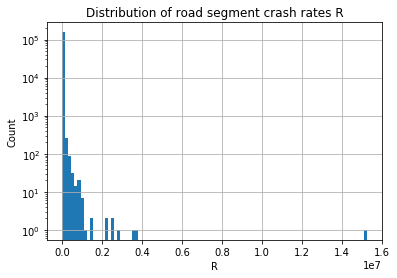

In [42]:
plt.hist(Y, bins=100, log=True)
plt.title('Distribution of road segment crash rates R')
plt.xlabel('R')
plt.ylabel('Count')
plt.grid()
plt.savefig('figures/r-to-count.png', dpi='figure')
plt.show()

## Segmenting into random forest and neural net datasets

The neural net and random forest algorithms process inputs a little differently, so we'll make two copies of the dataset that can be tailored to the needs of each model. Start by keeping only the columns going into the random forest model into the new copy.

The FHWA SPF needs some of the columns in the random forest dataset, plus a couple more from the neural net columns, but doesn't need the columns processed like the random forest does.

In [43]:
dfrf = df.loc[:,keep_rf]
print("Random forest feature count before one-hot encoding: ", len(dfrf.columns))
print("                           Neural net feature count: ", len(df.columns))

dfspf = df.loc[:,keep_rf.union(keep_spfs_not_in_rf)]

Random forest feature count before one-hot encoding:  36
                           Neural net feature count:  59


### One-hot encoding categorical columns

Our random forest library requires that we convert categorical columns into several one-hot (binary) columns if the category is not already binary. This isn't necessary for the neural net model, so we'll create a copy of our set of categorical column names as well.

In [44]:
categoricals_rf = keep_rf.intersection(categoricals)
one_hot_to_orig = {}

for col in to_one_hot:
    if col in dfrf.columns:
        # make the one-hot columns
        hots = pd.get_dummies(dfrf[col], prefix=col)
        dfrf = pd.concat([dfrf, hots], axis=1)
        dfrf.drop(col, axis=1, inplace=True)
        
        # update the keep_rf and categorical sets with the new column names
        keep_rf.remove(col)
        keep_rf.update(hots.columns)
        categoricals_rf.remove(col)
        categoricals_rf.update(hots.columns)
        
        # create dict entry to relate new column names to old ones
        for newcol in hots.columns:
            one_hot_to_orig[newcol] = col
        
to_one_hot = set() # no more cols left to one_hot
dfrf.head()

,LOAD_AXLE,LOAD_TAND,MED_WID,LANE_WIDTH,HOV_LANES,RB_WID,ACCEL_DECE,LOAD_GROSS,SPD_MIN,BRDG_STRUC,S_WID_I,SURF_TRE_1,S_WID_O,NUM_LANES,ROW_W_USL,SEC_BIC,SPD_MAX,HP_MED_W,SUR_W,ROW_MIN,SURF_TREAT_0,SURF_TREAT_1,SURF_TREAT_2,SURF_TREAT_4,SURF_TREAT_5,SURF_TREAT_7,SURF_TREAT_8,SURF_TREAT_9,HWY_STAT_0,HWY_STAT_6,S_TYPE_I_0,S_TYPE_I_1,S_TYPE_I_2,S_TYPE_I_3,S_TYPE_I_4,S_TYPE_I_5,S_TYPE_I_99,S_USE_I_0,S_USE_I_1,S_USE_I_2,S_USE_I_3,S_USE_I_4,S_USE_I_5,S_USE_I_6,S_USE_I_7,CURB_R_0,CURB_R_1,CURB_R_2,CURB_R_3,CURB_R_4,CURB_R_5,DIR_TRAV_0,DIR_TRAV_1,DIR_TRAV_3,DIR_TRAV_4,MED_TYPE_0,MED_TYPE_2,MED_TYPE_3,MED_TYPE_4,MED_TYPE_5,MED_TYPE_6,MED_TYPE_7,MED_TYPE_99,S_TYPE_O_0,S_TYPE_O_1,S_TYPE_O_2,S_TYPE_O_3,S_TYPE_O_4,S_TYPE_O_5,S_TYPE_O_99,SRF_TYPE_0,SRF_TYPE_1,SRF_TYPE_2,SRF_TYPE_3,SRF_TYPE_4,SRF_TYPE_5,SRF_TYPE_6,SRF_TYPE_7,SRF_TYPE_9,SRF_TYPE_10,SRF_TYPE_11,SRF_TYPE_13,BASE_TP_0,BASE_TP_1,BASE_TP_3,BASE_TP_4,BASE_TP_5,BASE_TP_6,BASE_TP_7,BASE_TP_9,BASE_TP_10,BASE_TP_11,BASE_TP_14,HOV_TYP_0,HOV_TYP_1,S_USE_O_0,S_USE_O_1,S_USE_O_2,S_USE_O_3,S_USE_O_4,S_USE_O_5,S_USE_O_6,S_USE_O_7,ACES_CTRL_0,ACES_CTRL_1,ACES_CTRL_2,ACES_CTRL_3,HWY_DES1_0,HWY_DES1_1,HWY_DES1_2,HWY_DES1_3,HWY_DES1_4,HWY_DES1_5,CLMB_PS_LA_0.0,CLMB_PS_LA_1.0,CLMB_PS_LA_2.0,CLMB_PS_LA_3.0,CURB_L_0,CURB_L_1,CURB_L_2,CURB_L_3,CURB_L_4,CURB_L_5
FID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,11,0.0,22,0,0,0,False,0,0.0,0,2,100,0,75,0,22,100,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,0,0,0,11,0.0,22,0,58420,0,False,0,0.0,0,2,80,0,55,0,22,80,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,0,11,0.0,24,0,0,0,False,1,0.5,1,2,100,0,50,1,22,100,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0,0,0,11,0.0,40,0,0,0,False,2,0.0,2,2,100,0,55,2,36,100,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0,0,0,10,0.0,24,0,58420,0,False,0,0.0,0,2,100,0,55,0,24,100,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [45]:
len(dfrf.columns)

123

## Split into training and test sets, remove extraneous data, and export

1. Determine IDs for training set. Remaining IDs are test set.
2. Split the SPF, random forest, and neural net dataframes by training set and test set IDs. Export resulting six dataframes.
3. Split the Y rate series from earlier using the same training and test sets IDs and export all 4 Ys.
4. Export the list of categorical columns in the neural net dataframe for use in the neural net model.
5. Save feature grouping dictionaries for use in visualizing RF suggestions.

In [46]:
# 1.
# train_ids = np.random.rand(len(df)) < 0.9
# np.savetxt('processed/ids_training.csv',df.index[train_ids])
# np.savetxt('processed/ids_test.csv',df.index[test_ids])

# if we already have a list of training ids
train_ids = df.index.isin(np.genfromtxt('processed/ids_training.csv'))

# 2.
df[train_ids].to_csv('processed/x_nn_training.csv')
df[~train_ids].to_csv('processed/x_nn_test.csv')
dfrf[train_ids].to_csv('processed/x_rf_training.csv')
dfrf[~train_ids].to_csv('processed/x_rf_test.csv')
dfspf[train_ids].to_csv('processed/x_spf_training.csv')
dfspf[~train_ids].to_csv('processed/x_spf_test.csv')

# 3.
Y[train_ids].to_csv('processed/y_training.csv', header=True)
Y[~train_ids].to_csv('processed/y_test.csv', header=True)

# 4.
np.save("processed/categoricals_nn.npy", categoricals)

# 5.
np.save("processed/one_hot_dict.npy", one_hot_to_orig)
np.save("processed/col_groups.npy", col_groups)